<a href="https://colab.research.google.com/github/Isanghada/_FINAL_PROJECT-CODE-/blob/main/vggnet_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!unzip -qq "/content/drive/MyDrive/Final_pro/김준형/음식점_음식사진.zip" -d "./dataset"

1003_화랑스시.jpg:  mismatching "local" filename (1003_эЩФыЮСьКдьЛЬ.jpg),
         continuing with "central" filename version
1005_폭폭.jpg:  mismatching "local" filename (1005_эПнэПн.jpg),
         continuing with "central" filename version
1006_애월더힐.jpg:  mismatching "local" filename (1006_ьХаьЫФыНФэЮР.jpg),
         continuing with "central" filename version
1007_플라이트.jpg:  mismatching "local" filename (1007_эФМыЭ╝ьЭ┤эК╕.jpg),
         continuing with "central" filename version
1009_노형한빛식당.jpg:  mismatching "local" filename (1009_ыЕ╕эШХэХЬы╣ЫьЛЭыЛ╣.jpg),
         continuing with "central" filename version
103_드렁큰디제이.jpg:  mismatching "local" filename (103_ыУЬыаБэБ░ыФФьаЬьЭ┤.jpg),
         continuing with "central" filename version
1057_금백조로가든.jpg:  mismatching "local" filename (1057_ъ╕Иы░▒ьб░ыбЬъ░АыУа.jpg),
         continuing with "central" filename version
1058_정가네연탄구이.jpg:  mismatching "local" filename (1058_ьаХъ░АыДдьЧ░эГДъ╡мьЭ┤.jpg),
         continuing with "central" filename versio

In [14]:
!unzip -qq "/content/drive/MyDrive/Final_pro/김남규/_관광명소 이미지.zip" -d "./dataset2"

관광명소/0_수목원테마파크 아이스뮤지엄.jpg:  mismatching "local" filename (ъ┤Аъ┤СыкЕьЖМ/0_ьИШыкйьЫРэЕМызИэММэБм ьХДьЭ┤ьКдыодьзАьЧД.jpg),
         continuing with "central" filename version
관광명소/1031_메이즈랜드.jpg:  mismatching "local" filename (ъ┤Аъ┤СыкЕьЖМ/1031_ыйФьЭ┤ьжИыЮЬыУЬ.jpg),
         continuing with "central" filename version
관광명소/1032_다이나믹메이즈 제주도성읍점.jpg:  mismatching "local" filename (ъ┤Аъ┤СыкЕьЖМ/1032_ыЛдьЭ┤ыВШып╣ыйФьЭ┤ьжИ ьаЬьг╝ыПДьД▒ьЭНьаР.jpg),
         continuing with "central" filename version
관광명소/1035_수산한못.jpg:  mismatching "local" filename (ъ┤Аъ┤СыкЕьЖМ/1035_ьИШьВ░эХЬык╗.jpg),
         continuing with "central" filename version
관광명소/1036_낭끼오름.jpg:  mismatching "local" filename (ъ┤Аъ┤СыкЕьЖМ/1036_ыВныБ╝ьШдыжД.jpg),
         continuing with "central" filename version
관광명소/1037_궁대악.jpg:  mismatching "local" filename (ъ┤Аъ┤СыкЕьЖМ/1037_ъ╢БыМАьХЕ.jpg),
         continuing with "central" filename version
관광명소/1039_후곡악.jpg:  mismatching "local" filename (ъ┤Аъ┤СыкЕьЖМ/1039_эЫДъ│бьХЕ.jpg),
      

In [4]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from pathlib import Path
from PIL import Image
class FeatureExtractor:
    def __init__(self):
        # Use VGG-16 as the architecture and ImageNet for the weight
        base_model = VGG16(weights='imagenet')
        # Customize the model to return features from fully-connected layer
        self.model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)
    def extract(self, img):
            # Resize the image
            img = img.resize((224, 224))
            # Convert the image color space
            img = img.convert('RGB')
            # Reformat the image
            x = image.img_to_array(img)
            x = np.expand_dims(x, axis=0)
            x = preprocess_input(x)
            # Extract Features
            feature = self.model.predict(x)[0]
            return feature / np.linalg.norm(feature)

fe = FeatureExtractor()

# Iterate through images (Change the path based on your image location)
# for img_path in sorted("/content/dataset"):
#     print(img_path)
#     # Extract Features
#     feature = fe.extract(img=Image.open(img_path))
#     # Save the Numpy array (.npy) on designated path
#     feature_path = "/content/dataset/test.npy"
#     np.save(feature_path, feature)

553476096/553467096 [==============================] - 3s 0us/step


In [19]:
import os

path = '/content/dataset2/관광명소'
file_list = os.listdir(path)
file_list_py = [file for file in file_list if file.endswith('.jpg')]
file_list_py

['969_폴리파크.jpg',
 '1462_돌하르방미술관.jpg',
 '1322_선녀와나무꾼 테마공원.jpg',
 '1031_메이즈랜드.jpg',
 '1240_한라수목원.jpg',
 '2994_괭이모루.jpg',
 '3213_비치미오름.jpg',
 '967_궷물오름.jpg',
 '3075_세화해변.jpg',
 '1051_모구리오름.jpg',
 '1625_김녕해수욕장.jpg',
 '190_대수산봉.jpg',
 '1623_묘산봉.jpg',
 '2252_올레길 14코스(저지-한림 올레).jpg',
 '3840_추자도.jpg',
 '4838_노리손이.jpg',
 '1_고스트타운.jpg',
 '1048_나시리오름.jpg',
 '1368_가문이오름.jpg',
 '2996_아부오름.jpg',
 '3782_트로이테마농원.jpg',
 '1054_월랑지.jpg',
 '1724_비밀의숲.jpg',
 '2385_신화테마파크.jpg',
 '3534_수월봉전망대.jpg',
 '1242_신비의도로.jpg',
 '1492_대섬.jpg',
 '804_갯거리오름.jpg',
 '743_비양도.jpg',
 '1036_낭끼오름.jpg',
 '1055_백약이오름.jpg',
 '208_알오름.jpg',
 '1956_제주허브동산.jpg',
 '2277_저지오름.jpg',
 '1959_제주유채꽃도로.jpg',
 '31_과물노천탕.jpg',
 '790_이달이촛대봉.jpg',
 '470_고성숲길.jpg',
 '199_올레길 1코스(시흥-광치기 올레).jpg',
 '441_제주러브랜드 (휴업중).jpg',
 '2388_뽀로로앤타요테마파크 제주.jpg',
 '19_애월해안도로.jpg',
 '203_두산봉.jpg',
 '4694_탐라계곡.jpg',
 '1615_먼물깍.jpg',
 '4017_용두암 인증센터.jpg',
 '1968_자배봉.jpg',
 '1938_가세오름.jpg',
 '3909_쇠머리오름.jpg',
 '449_광령저수지.jpg',
 '198_식산봉.jpg',
 '2393_문도지오름.jpg',
 '20

In [20]:
import matplotlib.pyplot as plt
import numpy as np

features = []
img_paths = []

# Save Image Feature Vector with Database Images
for i in file_list_py:
  try:
    image_path = "/content/dataset2/관광명소/" + i
    img_paths.append(image_path)

    # Extract Features
    feature = fe.extract(img=Image.open(image_path))

    features.append(feature)

    # Save the Numpy array (.npy) on designated path
    feature_path = "/content/dataset2/관광명소/" + i + ".npy"
    np.save(feature_path, feature)

  except Exception as e:
    print('예외가 발생했습니다.', e)

In [13]:
ids

array([ 955,  943,  135,  263, 1330])

In [30]:
scores[0][1].split("/")[4]

'24_곽지해수욕장.jpg'

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44285 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54644 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50837 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_

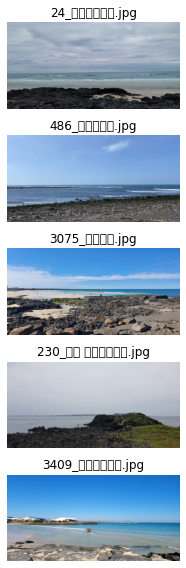

In [35]:
# Insert the image query
img = Image.open("/content/dataset2/관광명소/24_곽지해수욕장.jpg")
# Extract its features
query = fe.extract(img)

# Calculate the similarity (distance) between images
dists = np.linalg.norm(features - query, axis=1)

# Extract 30 images that have lowest distance
ids = np.argsort(dists)[:5]

scores = [(dists[id], img_paths[id], id) for id in ids]
# Visualize the result
axes=[]
fig=plt.figure(figsize=(8,8))
for a in range(5):
    score = scores[a]
    axes.append(fig.add_subplot(5,1, a+1))
    subplot_title=str(round(score[0],2)) + "/m" + str(score[2]+1)
    axes[-1].set_title(subplot_title)
    plt.title(f"{scores[a][1].split('/')[4]}")
    plt.axis('off')
    plt.imshow(Image.open(score[1]))
fig.tight_layout()
plt.show()